# Seasonality in prices on the Oslo stock exchange?

In this analysis we will use daily stock prices from the Oslo stock exchange index to explore possible seasonal trends. We will compare the returns over each week day, as well as the monthly returns. If we find any anomaly, can we take advantage of them in our investments? Some known historical market anomalies includes

* January effect
* Halloween effect (buy between Halloween and 1. may, sell the rest of the year)
* Santa claus rally (surge in prices between 26. December and 2. February)

more on Investopedia:  
https://www.investopedia.com/terms/a/anomaly.asp

### Import and prepare the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

# import osbx (Oslo stock exchange index, OSEBX)
osbx = pd.read_excel("osbx.xlsx")
osbx.head(10)

,OSEBX,Siste,Høy,Lav,Offisielt omsatt (NOK)
0,2020-02-25,894.98,909.54,888.99,6.428971e+09
1,2020-02-24,898.40,936.45,896.15,6.686155e+09
2,2020-02-21,936.70,942.89,932.48,4.830077e+09
3,2020-02-20,942.89,943.50,934.92,5.357239e+09
4,2020-02-19,934.93,934.94,926.46,4.140447e+09
5,2020-02-18,926.68,927.98,921.04,3.731018e+09
6,2020-02-17,927.98,933.93,925.84,3.274685e+09
7,2020-02-14,929.24,931.98,926.03,3.889820e+09
8,2020-02-13,926.25,930.76,917.97,5.012010e+09
9,2020-02-12,930.77,933.44,923.98,5.458857e+09


In [2]:
# revese the order of the DataFrame
osbx = osbx.iloc[::-1]

# only keep daily close
osbx = osbx[["OSEBX", "Siste"]]

# rename columns
osbx.rename(columns={"OSEBX": "Date", "Siste": "Close"}, inplace=True)

# change the index to Date
osbx.set_index("Date", inplace=True)

# calculate daily returns and add to the DataFrame
osbx["return"] = osbx["Close"].pct_change()

# remove the first row, as it is nan
osbx.dropna(inplace=True)
osbx.head(10)

,Close,return
Date,,
1996-01-02,101.4633,0.014633
1996-01-03,103.5006,0.020079
1996-01-04,103.4110,-0.000866
1996-01-05,103.0309,-0.003676
1996-01-08,103.9631,0.009048
1996-01-09,103.4211,-0.005213
1996-01-10,102.0742,-0.013023
1996-01-11,103.0205,0.009271
1996-01-12,102.6329,-0.003762


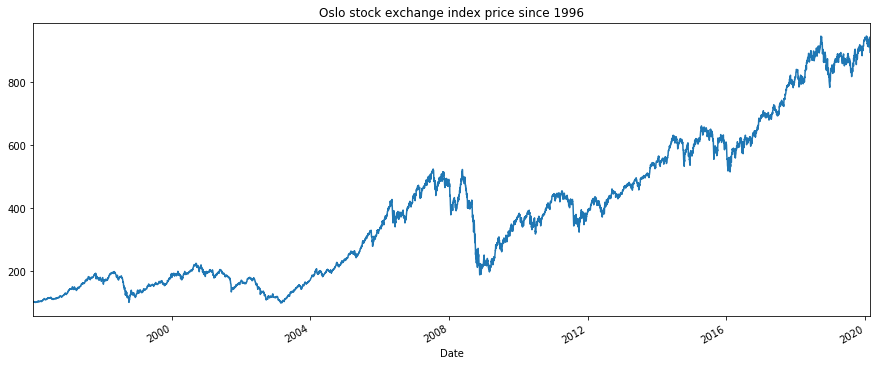

In [3]:
# plot the daily close price over time
osbx["Close"].plot(figsize=(15,6), title="Oslo stock exchange index price since 1996")

In [4]:
import datetime as datetime
import calendar

# example of how to use calendar
print("First day in the week:")
print(calendar.day_name[0])
print("First month in the year:")
print(calendar.month_name[1])

First day in the week:
Monday
First month in the year:
January


In [5]:
# exclude 2020 onwards, only keeping the whole years 1996 through 2019
osbx = osbx["1996":"2019"]

# determine the weekday and add it as a new column to the DataFrame
osbx["Weekday"] = osbx.index.weekday.values
osbx["Weekday"] = osbx["Weekday"].apply(lambda x: calendar.day_name[x])

# determine the month and add it as a new column to the DataFrame
osbx["Month"] = osbx.index.month.values
osbx["Month"] = osbx["Month"].apply(lambda x: calendar.month_name[x])

# determine the year, convert it to string, and add it as a new column to the DataFrame
osbx["Year"] = osbx.index.year.values
osbx["Year"] = osbx["Year"].astype(str)

osbx.head(10)

,Close,return,Weekday,Month,Year
Date,,,,,
1996-01-02,101.4633,0.014633,Tuesday,January,1996
1996-01-03,103.5006,0.020079,Wednesday,January,1996
1996-01-04,103.4110,-0.000866,Thursday,January,1996
1996-01-05,103.0309,-0.003676,Friday,January,1996
1996-01-08,103.9631,0.009048,Monday,January,1996
1996-01-09,103.4211,-0.005213,Tuesday,January,1996
1996-01-10,102.0742,-0.013023,Wednesday,January,1996
1996-01-11,103.0205,0.009271,Thursday,January,1996
1996-01-12,102.6329,-0.003762,Friday,January,1996


### Weekdays

Are stock returns the same for each weekday?

Asumption:  
* We use daily close, so the stock returns will be the return from the close the day before until the close the next day
* Some weekdays have more trading days than others, but simply averaging takes care of this
* Although the years don't have the same returns, we don't normalize the data in this analysis

In [6]:
# Mean return for each weekday
osbx_weekday_mean = osbx.groupby("Weekday").mean()

# reorder
osbx_weekday_mean = osbx_weekday_mean.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
osbx_weekday_mean

,Close,return
Weekday,,
Monday,384.274837,0.000332
Tuesday,383.560844,0.000344
Wednesday,385.090721,0.000060
Thursday,385.509466,0.000454
Friday,386.212633,0.001143


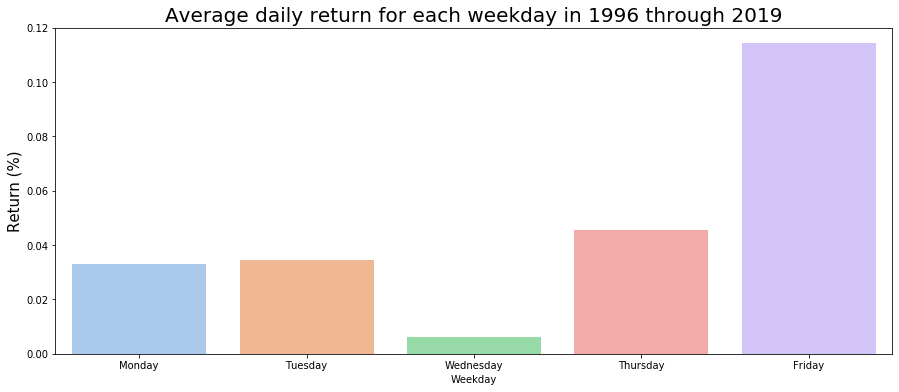

In [7]:
x = osbx["Weekday"]
y = 100*osbx_weekday_mean["return"]

# reorder
osbx_weekday_mean = osbx_weekday_mean.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
osbx_weekday_mean

# barplot of the average return for each week day
import seaborn as sns
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=osbx_weekday_mean.index, y=y, data=osbx_weekday_mean)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily return for each weekday in 1996 through 2019", size=20)
plt.savefig('osbx1.png')
plt.show()


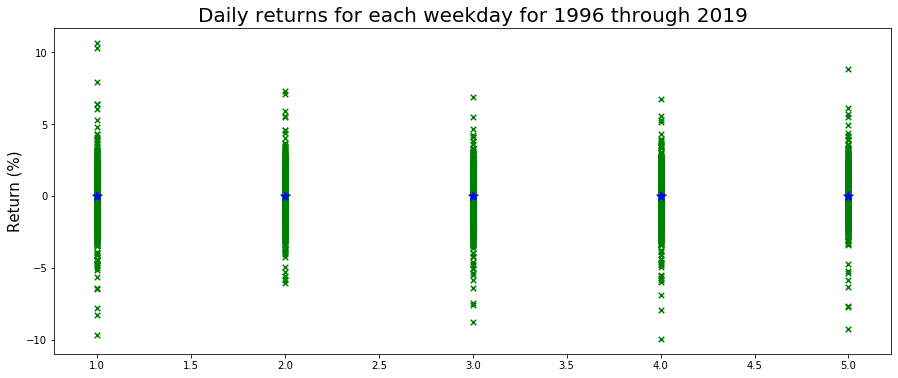

In [8]:
# Scatter plot of all observations to see the variations for each weekday
x = osbx["Weekday"].values
y = 100*osbx["return"].values

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
points = [[x[i], y[i]] for i in range(0,len(x))]
for i in range(0,len(points)):
    points[i][0] = days.index(points[i][0])+1
    
x = [points[i][0] for i in range(0,len(points))]
y = [points[i][1] for i in range(0,len(points))]

fig = plt.figure(figsize=(15,6))
ax = plt.scatter(x, y, color="green", linewidths=3, marker="x", s=30)
ax = plt.scatter([1,2,3,4,5], osbx_weekday_mean["return"], color="blue", marker="*", s=100)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Daily returns for each weekday for 1996 through 2019", size=20)
plt.savefig('osbx2.png')
plt.show()

In [9]:
# volatility of the returns for each weekday
osbx["return"] = osbx["return"]
weekday_vol = osbx[["Weekday", "return"]].groupby("Weekday").std()
print(weekday_vol)
print()

# number of weekdays
print(osbx[["Weekday", "return"]].groupby("Weekday").count())

             return
Weekday            
Friday     0.012935
Monday     0.015154
Thursday   0.014128
Tuesday    0.013043
Wednesday  0.013324

           return
Weekday          
Friday       1205
Monday       1181
Thursday     1181
Tuesday      1227
Wednesday    1226


Since the market has been increasing by over 800% in this period we would expect the average daily return to be positive for each weekday, and about the same size. With about 1200 observations for each weekday, the results appear on first glance to be significant. Let's apply t-tests to the samples.

### Statistically significance?
 
Now we want to test whether or not the average return for each weekday is statistically significantly different from the average return over all the months using a t-test.

For i from Monday to Friday:  
$H_0: \mu_i = \text{Grand mean}$  
$H_1: \mu_i \neq \text{Grand mean}$  

In [11]:
# Perform statistical analysis
from scipy import stats

average_return = osbx_weekday_mean["return"].mean()

for day in osbx_weekday_mean.index.values:
    sample = np.array(osbx[osbx.Weekday == day]["return"])
    print(day,":", stats.ttest_1samp(sample, average_return))

Monday : Ttest_1sampResult(statistic=-0.30610269353474284, pvalue=0.7595804538335246)
Tuesday : Ttest_1sampResult(statistic=-0.3287514331212029, pvalue=0.7423997199940513)
Wednesday : Ttest_1sampResult(statistic=-1.0686242408888966, pvalue=0.2854495513885472)
Thursday : Ttest_1sampResult(statistic=-0.03091527444935492, pvalue=0.9753423364587951)
Friday : Ttest_1sampResult(statistic=1.8161549426485668, pvalue=0.06959521516909183)


The p-value for Friday is 0.0696, which corresponds to a confidence of 93.04%. Although not statistcally significant for most, it would be worth looking into the mechanism behind to determine wheather this is a real anomaly or just noise.

So why might this be? Overnight risk expose investors to events in international markets, suggesting there would be more selling on fridays which would drive prices down. However the opposite is happening. It might also have to do with people's moods close to the weekend, increasing optimism which get prices to rise.

Next let's look at how the returns for each week day changes over the years.

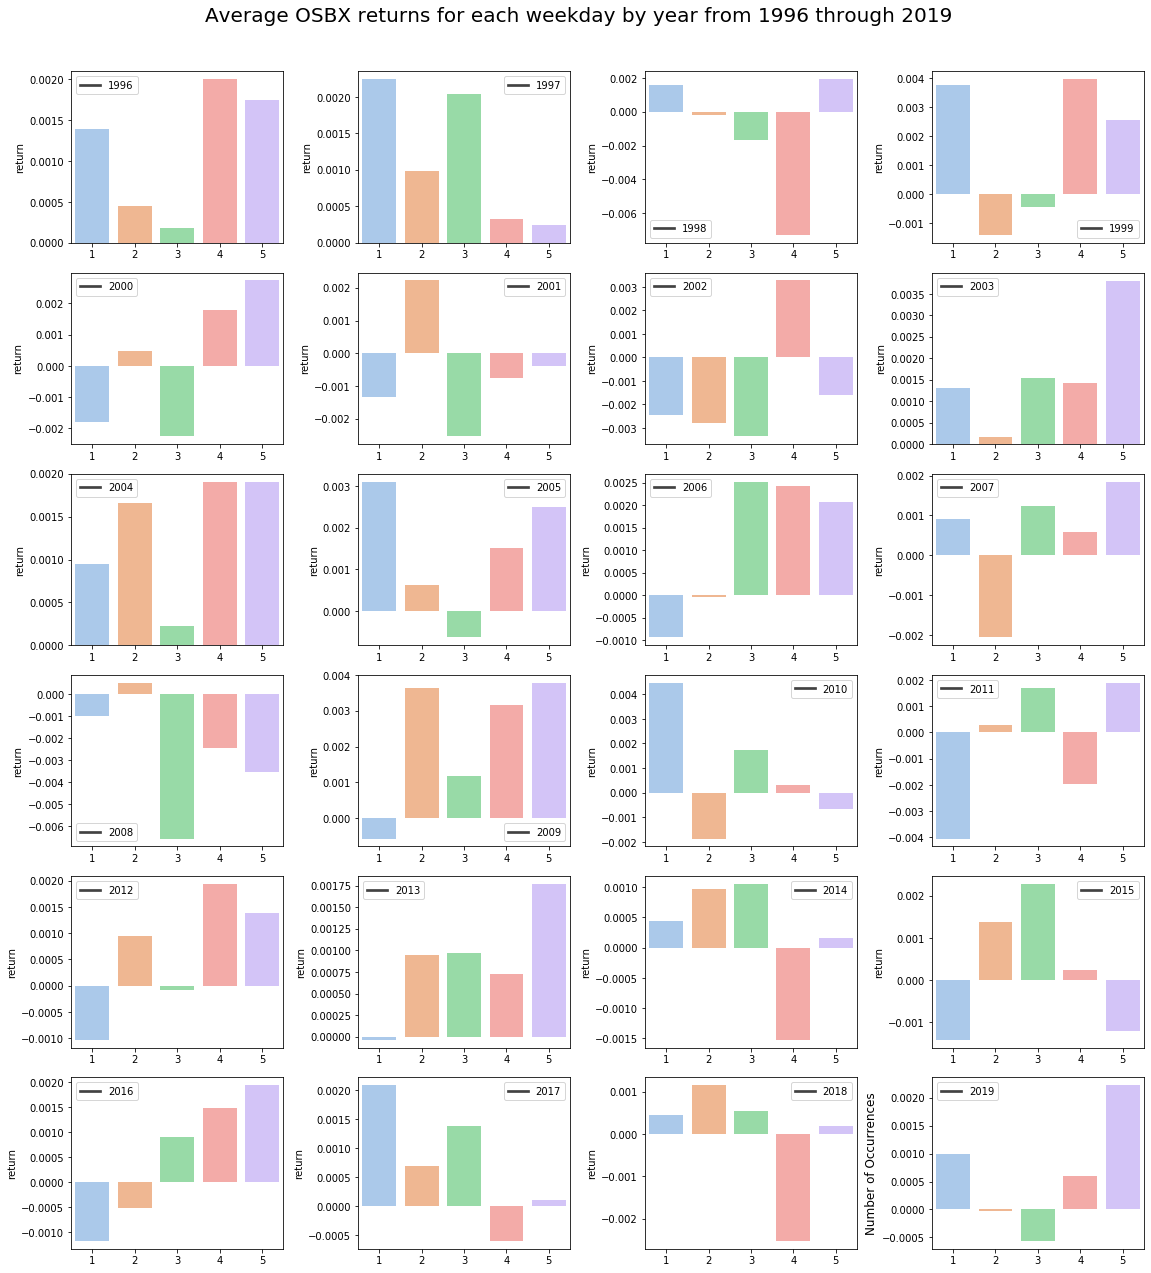

In [17]:
years = range(1996, 2020)
nr_rows = 6
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])


count = 0
for year in years:
    osbx_year = osbx[str(year)]
    # Mean return for each weekday
    osbx_year = osbx_year.groupby("Weekday").mean()
    # reorder
    osbx_year = osbx_year.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
    # plot
    sns.barplot(x=[1,2,3,4,5], y="return", data=osbx_year, ax=axis[count])
    plt.ylabel('Number of Occurrences', fontsize=12)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average OSBX returns for each weekday by year from 1996 through 2019", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('osbx3.png')
plt.show()

Perhaps the biggest problem using this as a strategy is the large inconsistency. Some years friday is among the best performing days, while in other years it is among the worst. I wouldn't be confident unless the we can see a trend year by year.

# Months

Calculate the monthly returns for each month from 1996 through 2019, and calculate the average for each unique month

In [18]:
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]


# add 1 to the return columm and only keep the relevant columns
osbx["return"] = osbx["return"] + 1
osbx_month = osbx[["return", "Month", "Year"]]
# subtract 1 again to get back the return
osbx["return"] = osbx["return"] - 1

# group by Month and multiply the returns+1 together for each month, subtracting 1 at the end
osbx_month = osbx_month.groupby(["Month", "Year"]).prod()-1
# convert the returns to percentage
osbx_month["return"] = osbx_month["return"]


osbx_month.reset_index(inplace=True)
osbx_month.Month = osbx_month.Month.astype("category")
osbx_month.Month.cat.set_categories(months, inplace=True)
osbx_month.sort_values(["Month"], inplace=True)
osbx_month

,Month,Year,return
103,January,2003,-0.047652
96,January,1996,0.012275
97,January,1997,0.086216
98,January,1998,-0.024777
99,January,1999,0.088008
...,...,...,...
52,December,2000,0.001109
51,December,1999,0.116397
48,December,1996,0.045666
60,December,2008,0.025500


In [19]:
# sort the years as well
osbx_returns = pd.DataFrame(columns=osbx_month.columns)
count = 0
for i in range(0,12):
    osbx_year = osbx_month[24*i:24*(i+1)]
    osbx_year.Year = osbx_year.Year.astype("category")
    osbx_year.Year.cat.set_categories([str(year) for year in years], inplace=True)
    osbx_year.sort_values(["Year"], inplace=True)
    osbx_returns = pd.concat([osbx_returns, osbx_year], ignore_index=True)
    count = count + 1

osbx_returns

,Month,Year,return
0,January,1996,0.012275
1,January,1997,0.086216
2,January,1998,-0.024777
3,January,1999,0.088008
4,January,2000,-0.027852
...,...,...,...
283,December,2015,-0.029422
284,December,2016,0.041485
285,December,2017,0.022113
286,December,2018,-0.071453


In [20]:
# calculate the average monthly return for all months
osbx_month_returns = osbx_returns.groupby(["Month"]).mean()

# reorder
osbx_month_returns = osbx_month_returns.reindex(months)
osbx_month_returns

,return
Month,
January,0.005459
February,0.015319
March,0.015270
April,0.033251
May,0.012396
June,-0.001921
July,0.013558
August,-0.009843
September,-0.015038


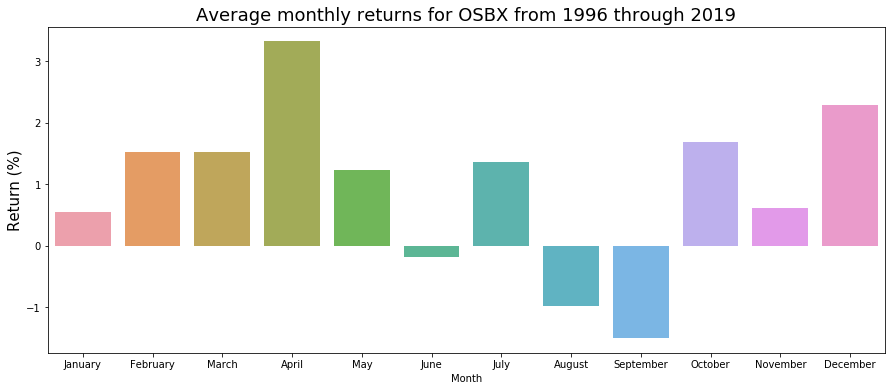

In [21]:
# plot the barplot of the average monthly returns in percentage
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=osbx_month_returns.index, y=100*osbx_month_returns["return"], alpha=0.9)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average monthly returns for OSBX from 1996 through 2019", size=18)
plt.savefig('osbx4.png')
plt.show()

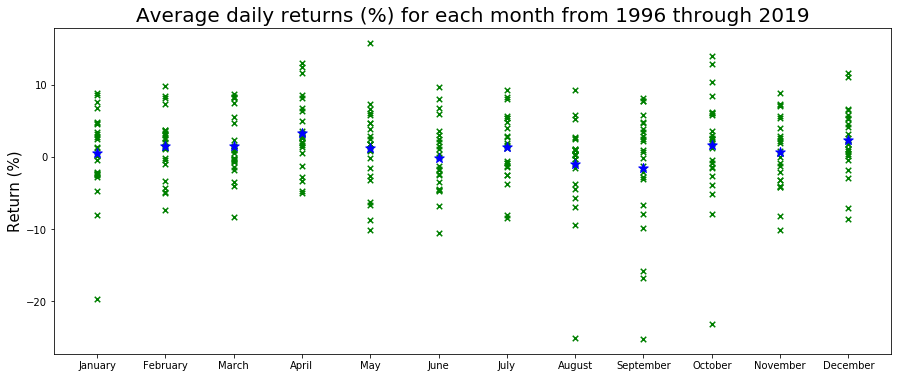

In [22]:
# scatter plot of the monthly returns in percentage
fig = plt.figure(figsize=(15,6))
ax = plt.scatter(x=osbx_returns["Month"], y=100*osbx_returns["return"], color="green", linewidths=3, marker="x", s=30)
ax = plt.scatter(months, 100*osbx_month_returns, color="blue", marker="*", s=100)
ax = plt.ylabel("Return (%)", size=15)
ax = plt.title("Average daily returns (%) for each month from 1996 through 2019", size=20)
plt.savefig('osbx5.png')
plt.show()

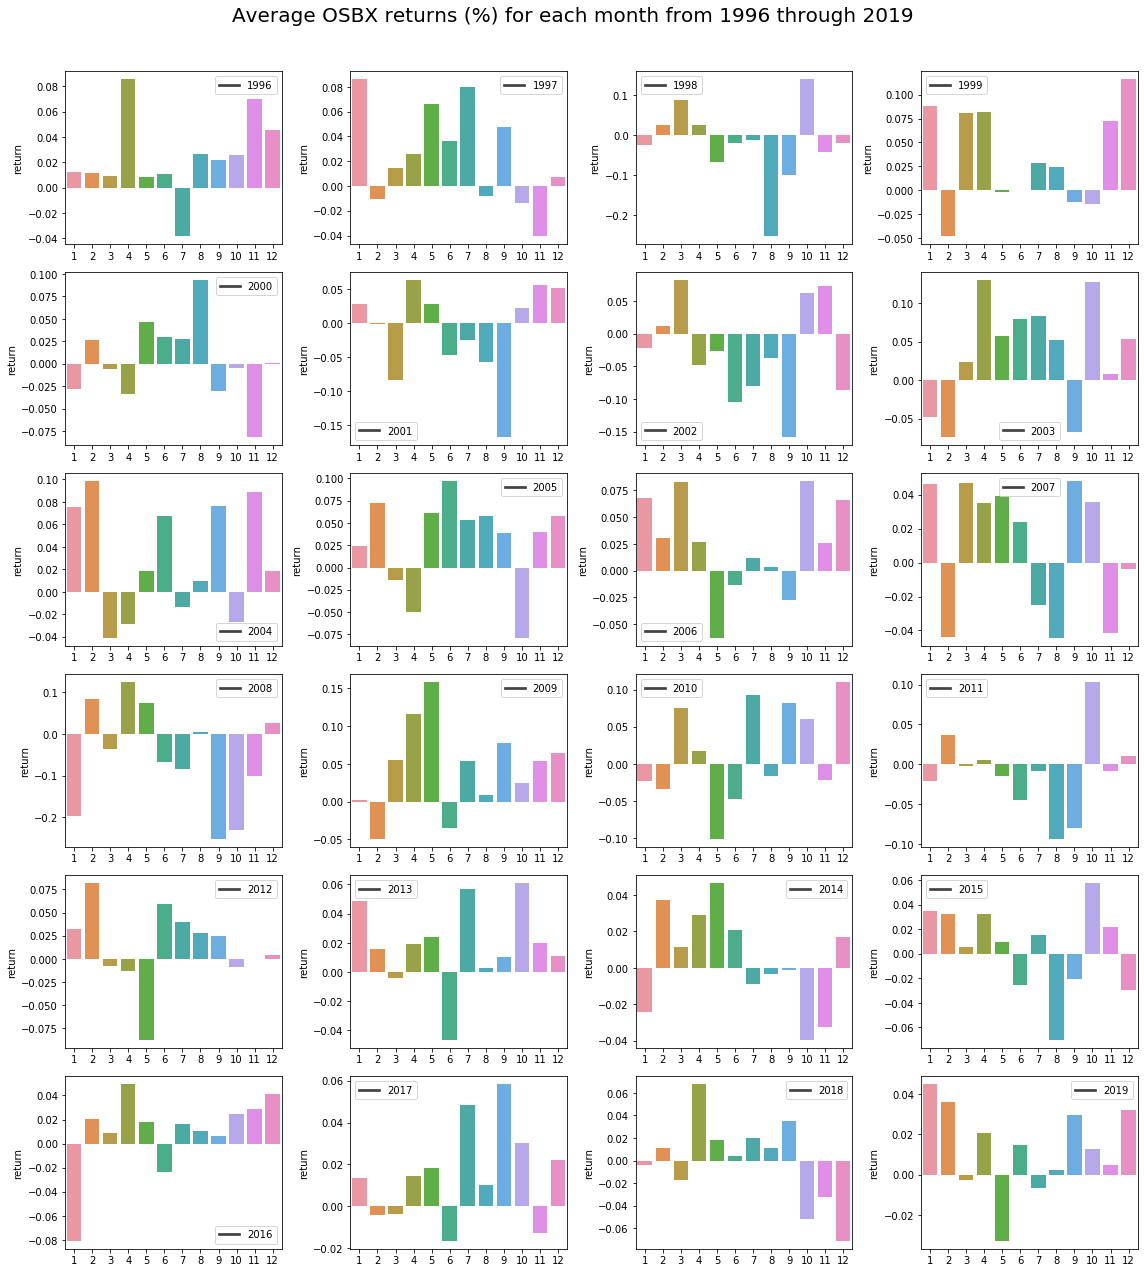

In [23]:
# Plot of the monthly return for each year from 1996 through 2019 in percentage
years = range(1996, 2020)
nr_rows = 6
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    osbx_year = osbx_returns[osbx_returns.Year == str(year)]
    # Mean return for each weekday
    osbx_year = osbx_year.groupby("Month").mean()
    # reorder
    osbx_year = osbx_year.reindex(["January", "February", "March", "April",
                                   "May", "June", "July", "August", "September", "October", "November", "December"])
    # plot
    axis[count] = sns.barplot(x=[1,2,3,4,5,6,7,8,9,10,11,12], y="return", data=osbx_year, ax=axis[count])
    #axis[count].ylabel("Return (%)")
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average OSBX returns (%) for each month from 1996 through 2019", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('osbx6.png')
plt.show()

In [24]:
# average monthly return over all months
average_return = osbx_month_returns.mean()
average_return[0]

0.009528467140723086

In [25]:
from scipy import stats

for month in months:
    sample = osbx_returns[osbx_returns.Month == month]["return"]
    print(month,":", stats.ttest_1samp(sample, average_return))
    print()

January : Ttest_1sampResult(statistic=return   -0.324761
dtype: float64, pvalue=array([0.74829733]))

February : Ttest_1sampResult(statistic=return    0.641473
dtype: float64, pvalue=array([0.52755705]))

March : Ttest_1sampResult(statistic=return    0.639258
dtype: float64, pvalue=array([0.52897083]))

April : Ttest_1sampResult(statistic=return    2.318567
dtype: float64, pvalue=array([0.02965956]))

May : Ttest_1sampResult(statistic=return    0.245649
dtype: float64, pvalue=array([0.80813272]))

June : Ttest_1sampResult(statistic=return   -1.15159
dtype: float64, pvalue=array([0.26132033]))

July : Ttest_1sampResult(statistic=return    0.424322
dtype: float64, pvalue=array([0.67527341]))

August : Ttest_1sampResult(statistic=return   -1.446314
dtype: float64, pvalue=array([0.16158025]))

September : Ttest_1sampResult(statistic=return   -1.419896
dtype: float64, pvalue=array([0.16905128]))

October : Ttest_1sampResult(statistic=return    0.472327
dtype: float64, pvalue=array([0.641144

April has the lowest p-value with 0.0297, and December has 0.0538. The rest of the months have non significant values.

It is worth noting that large one month drawdowns can have a major effect on the average return when we only have 24 observations. Using a longer time frame could be interesing, but paradigms change, and if a market anomaly becomes well known, it will quickly be exploited and removed. As markets become more efficient it becomes more difficult to find such patterns.

# Day of the month

Lastly we wish to look at the day of the month to see if investors have any preference in terms when in the month they invest.

In [26]:
# mean return of each day of the month (note that 31 will have a smaller sample size)
day_of_month_return = osbx[["return"]].groupby(osbx.index.day).mean()
day_of_month_return.head()

,return
Date,
1,0.001715
2,0.002664
3,0.000950
4,0.000957
5,-0.000757


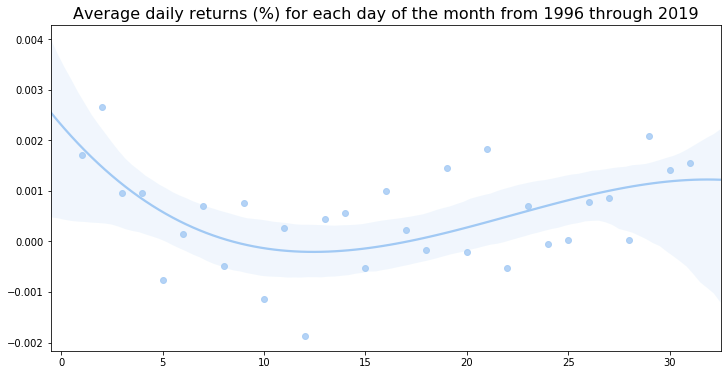

In [27]:
ax, fig = plt.subplots(figsize=(12,6))
ax = sns.regplot(day_of_month_return.index.values, day_of_month_return.values, order=3)
ax = plt.title("Average daily returns (%) for each day of the month from 1996 through 2019", size=16)
plt.savefig('osbx7.png')
plt.show()

In [28]:
# group by year
year_return = osbx[["return"]].groupby(osbx.index.year).mean()
year_return.head()

,return
Date,
1996,0.001147
1997,0.001170
1998,-0.001090
1999,0.001628
2000,0.000206


In [29]:
day_returns = pd.DataFrame(index=range(1,32))

for year in years:
    day_returns[str(year)] = osbx[str(year)]["return"].groupby(osbx[str(year)].index.day).mean()

In [30]:
# daily average over all days from 1996 through 2019
average_return = day_of_month_return.mean()
average_return[0]

days = range(0,31)
for day in days:
    print(day+1,":", stats.ttest_1samp(day_returns.iloc[day], average_return))
    print()

1 : Ttest_1sampResult(statistic=return    0.599067
dtype: float64, pvalue=array([0.55498334]))

2 : Ttest_1sampResult(statistic=return    1.888499
dtype: float64, pvalue=array([0.07163584]))

3 : Ttest_1sampResult(statistic=return    0.261092
dtype: float64, pvalue=array([0.79634543]))

4 : Ttest_1sampResult(statistic=return    0.378935
dtype: float64, pvalue=array([0.7082116]))

5 : Ttest_1sampResult(statistic=return   -1.162419
dtype: float64, pvalue=array([0.25698529]))

6 : Ttest_1sampResult(statistic=return   -0.38279
dtype: float64, pvalue=array([0.70538996]))

7 : Ttest_1sampResult(statistic=return    0.129927
dtype: float64, pvalue=array([0.89775362]))

8 : Ttest_1sampResult(statistic=return   -1.26641
dtype: float64, pvalue=array([0.21804252]))

9 : Ttest_1sampResult(statistic=return    0.176639
dtype: float64, pvalue=array([0.86133776]))

10 : Ttest_1sampResult(statistic=return   -1.478614
dtype: float64, pvalue=array([0.15280925]))

11 : Ttest_1sampResult(statistic=return   

* 2. : 0.07163584 (return higher than the average)
* 12. : 0.0114696 (return lower than the average)
* 29. : 0.08354356 (return higher than the average)

By testing 31 days we expect that on average at least one of the tests will reject the null hypothesis. A p-value of 0.0111 observed on the 12. is a bit low though.

We observe a slight U-shape in returns. With days at the beginning and end of the month having a little higher return than the intramonth days. Now let's look at the return distribution over all the years.

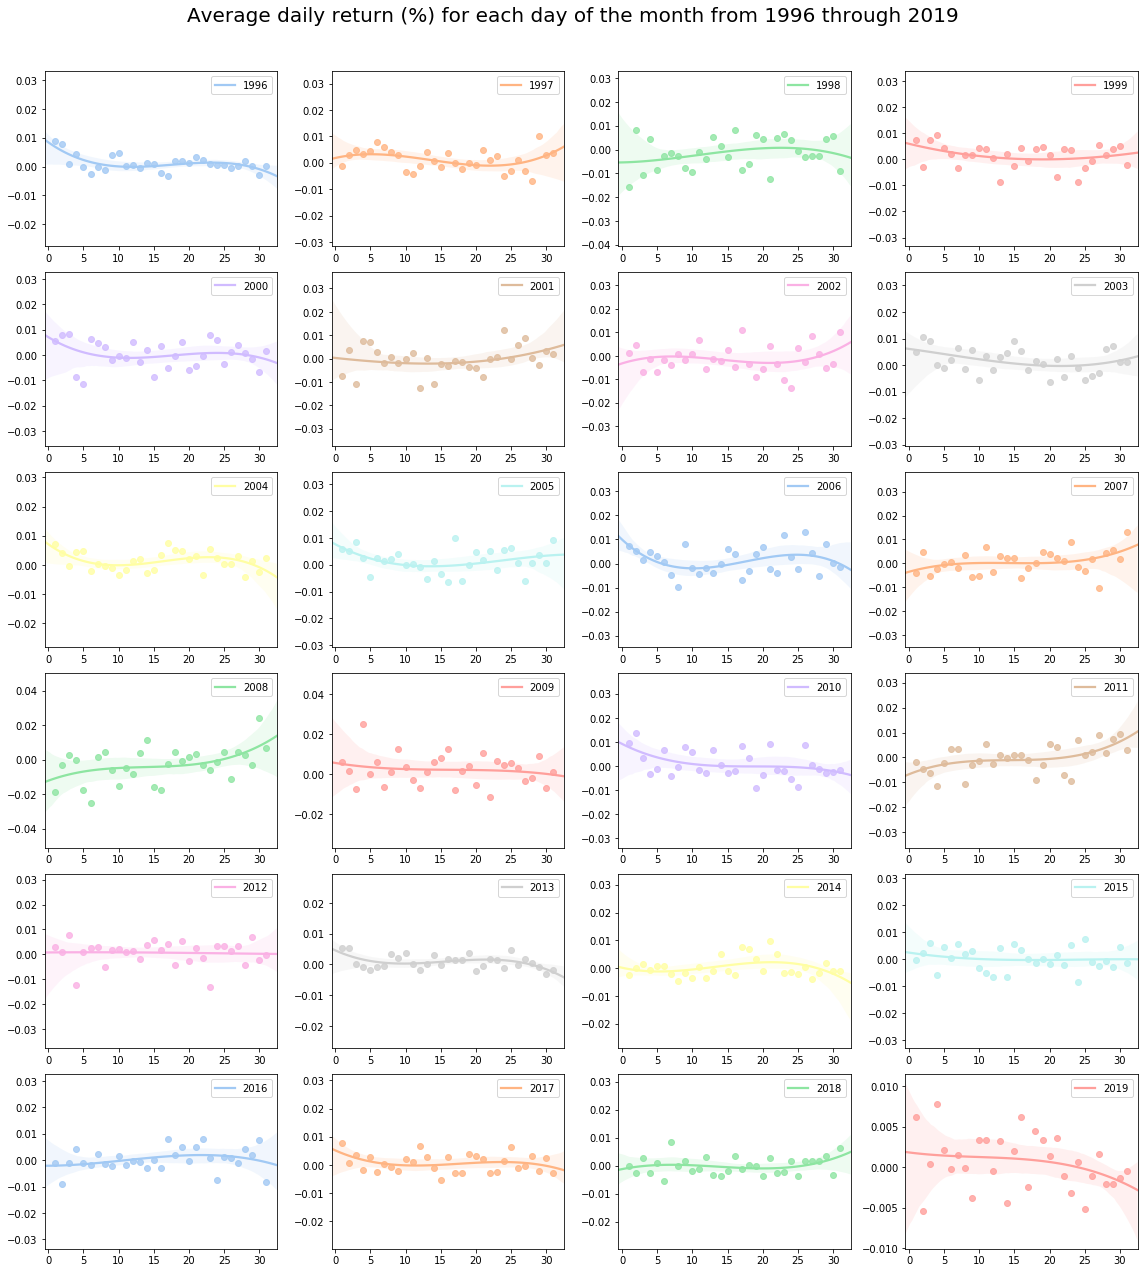

In [29]:
nr_rows = 6
nr_cols = 4
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3), squeeze=False)

axis = []
for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        axis.append(axs[r][c])

count = 0
for year in years:
    returns = day_returns[str(year)]
    axis[count] = sns.regplot(x=returns.index.values, y=returns.values, ax=axis[count], order=3)
    axis[count].legend([str(years[count])])
    count = count + 1

fig.suptitle("Average daily return (%) for each day of the month from 1996 through 2019", size=20)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.savefig('osbx8.png')
plt.show()

This was an interesting exercise, but only that. I wouldn't suggest using this as a basis for a strategy due to the limited significance, and large variations causing a week day or month to have returns derived from unrelated events. Looking further into week days would be interesting because of the larger sample size. Also, a proper time series analysis using a higher data granularity could be employed for more insight.